# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2020/2020-02-25/measles.csv', 
                   show_col_types = FALSE)

df |>head ()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


First visualization:
Create a table that shows the five states with the largest fractions of schools above the CDC target MMR vaccination rate of 95%.

Steps:
1. Exclude missing value using `mmr>=0`
2. group by `state`
3. caculate the proportion
4. print the table using `slice_max`

In [3]:
df_rate = df |>
    filter (mmr >=0)|>
    group_by(state) |>
    summarize (obs = n(),
              n_above_95 = sum(mmr>=95,na.rm=TRUE),
              frac_above_95 = sum(mmr>=95,na.rm=TRUE)/n())
df_rate|>
    slice_max (order_by = frac_above_95, n=5)

state,obs,n_above_95,frac_above_95
<chr>,<int>,<int>,<dbl>
Illinois,7686,6893,0.8968254
California,14225,12639,0.8885062
Massachusetts,954,826,0.8658281
New York,4159,3576,0.8598221
Pennsylvania,1939,1619,0.8349665


Second visualization:
Make ECDF plots of the school MMR vaccination rates in each states with a line marking the CDC target vaccination rate of 95%, excluding missing value. 

Steps:
1. Exclude missing value using `mmr>=0`
2. group by `state`
3. create a variable for ECDF plots
4. create the ECDF plots

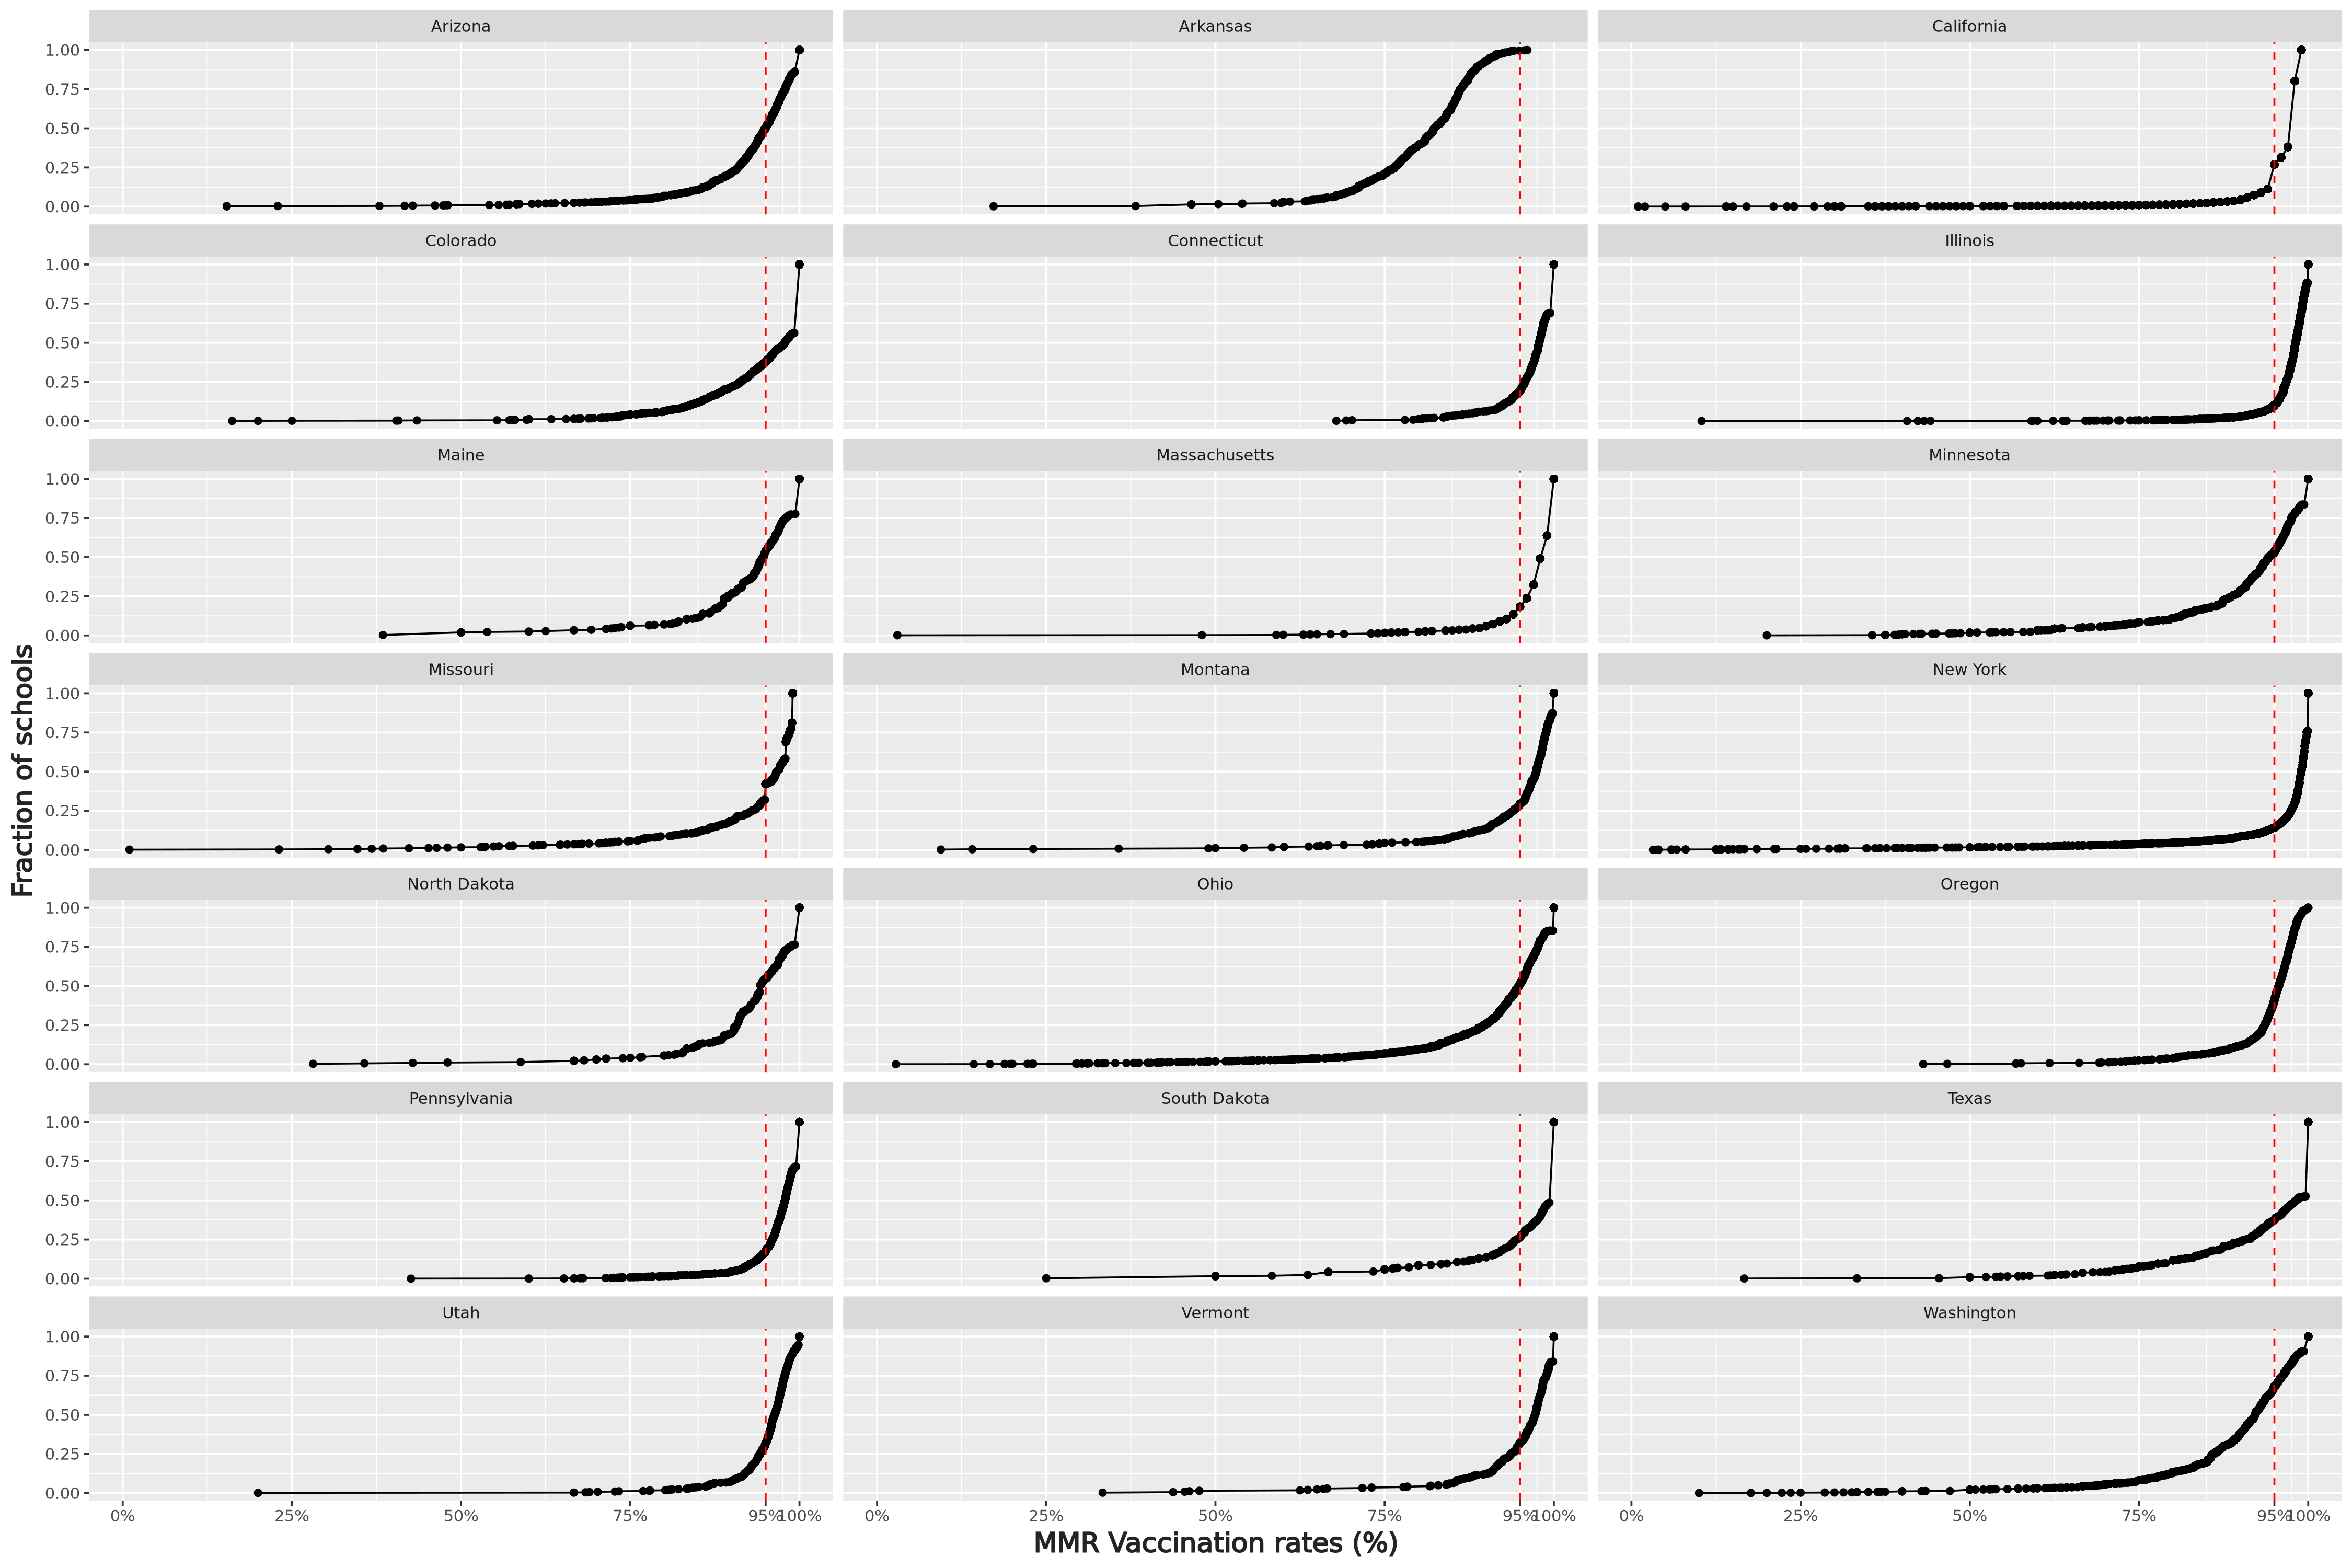

In [4]:
df_states = df |>
    filter (mmr >=0)|>
    group_by(state) |>
    mutate (ecdf = cume_dist(mmr))


options(repr.plot.width = 18, repr.plot.height = 12)
ggplot (df_states, aes(x=mmr, y=ecdf))+
        geom_point()+
        geom_line()+
        facet_wrap(~state, ncol=3, scales = "fixed")+
        labs(x= 'MMR Vaccination rates (%)', y = 'Fraction of schools')+
        geom_vline(xintercept=95, linetype="dashed", color = "red")+
        scale_x_continuous(limits=c(0, 100), breaks = c(0, 25, 50, 75, 95, 100), labels = scales::percent_format(suffix = '%', scale = 1))+
        theme(
            axis.title.y = element_text(color = '#242424', face = 'bold', size = 15),
            axis.title.x = element_text(color = '#242424', face = 'bold', size = 15)
        )

Third vizualization:
Create a map that identifies the schools on the U.S. mainland with an MMR vaccination rate of 100%.

Steps:
1. Create a dataset called "df_rate" by filtering `mmr= 100` and `lng<=0`.
2. Load the mapdata package.
3. Use `geom_polyg and geom-point` to create the map.

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




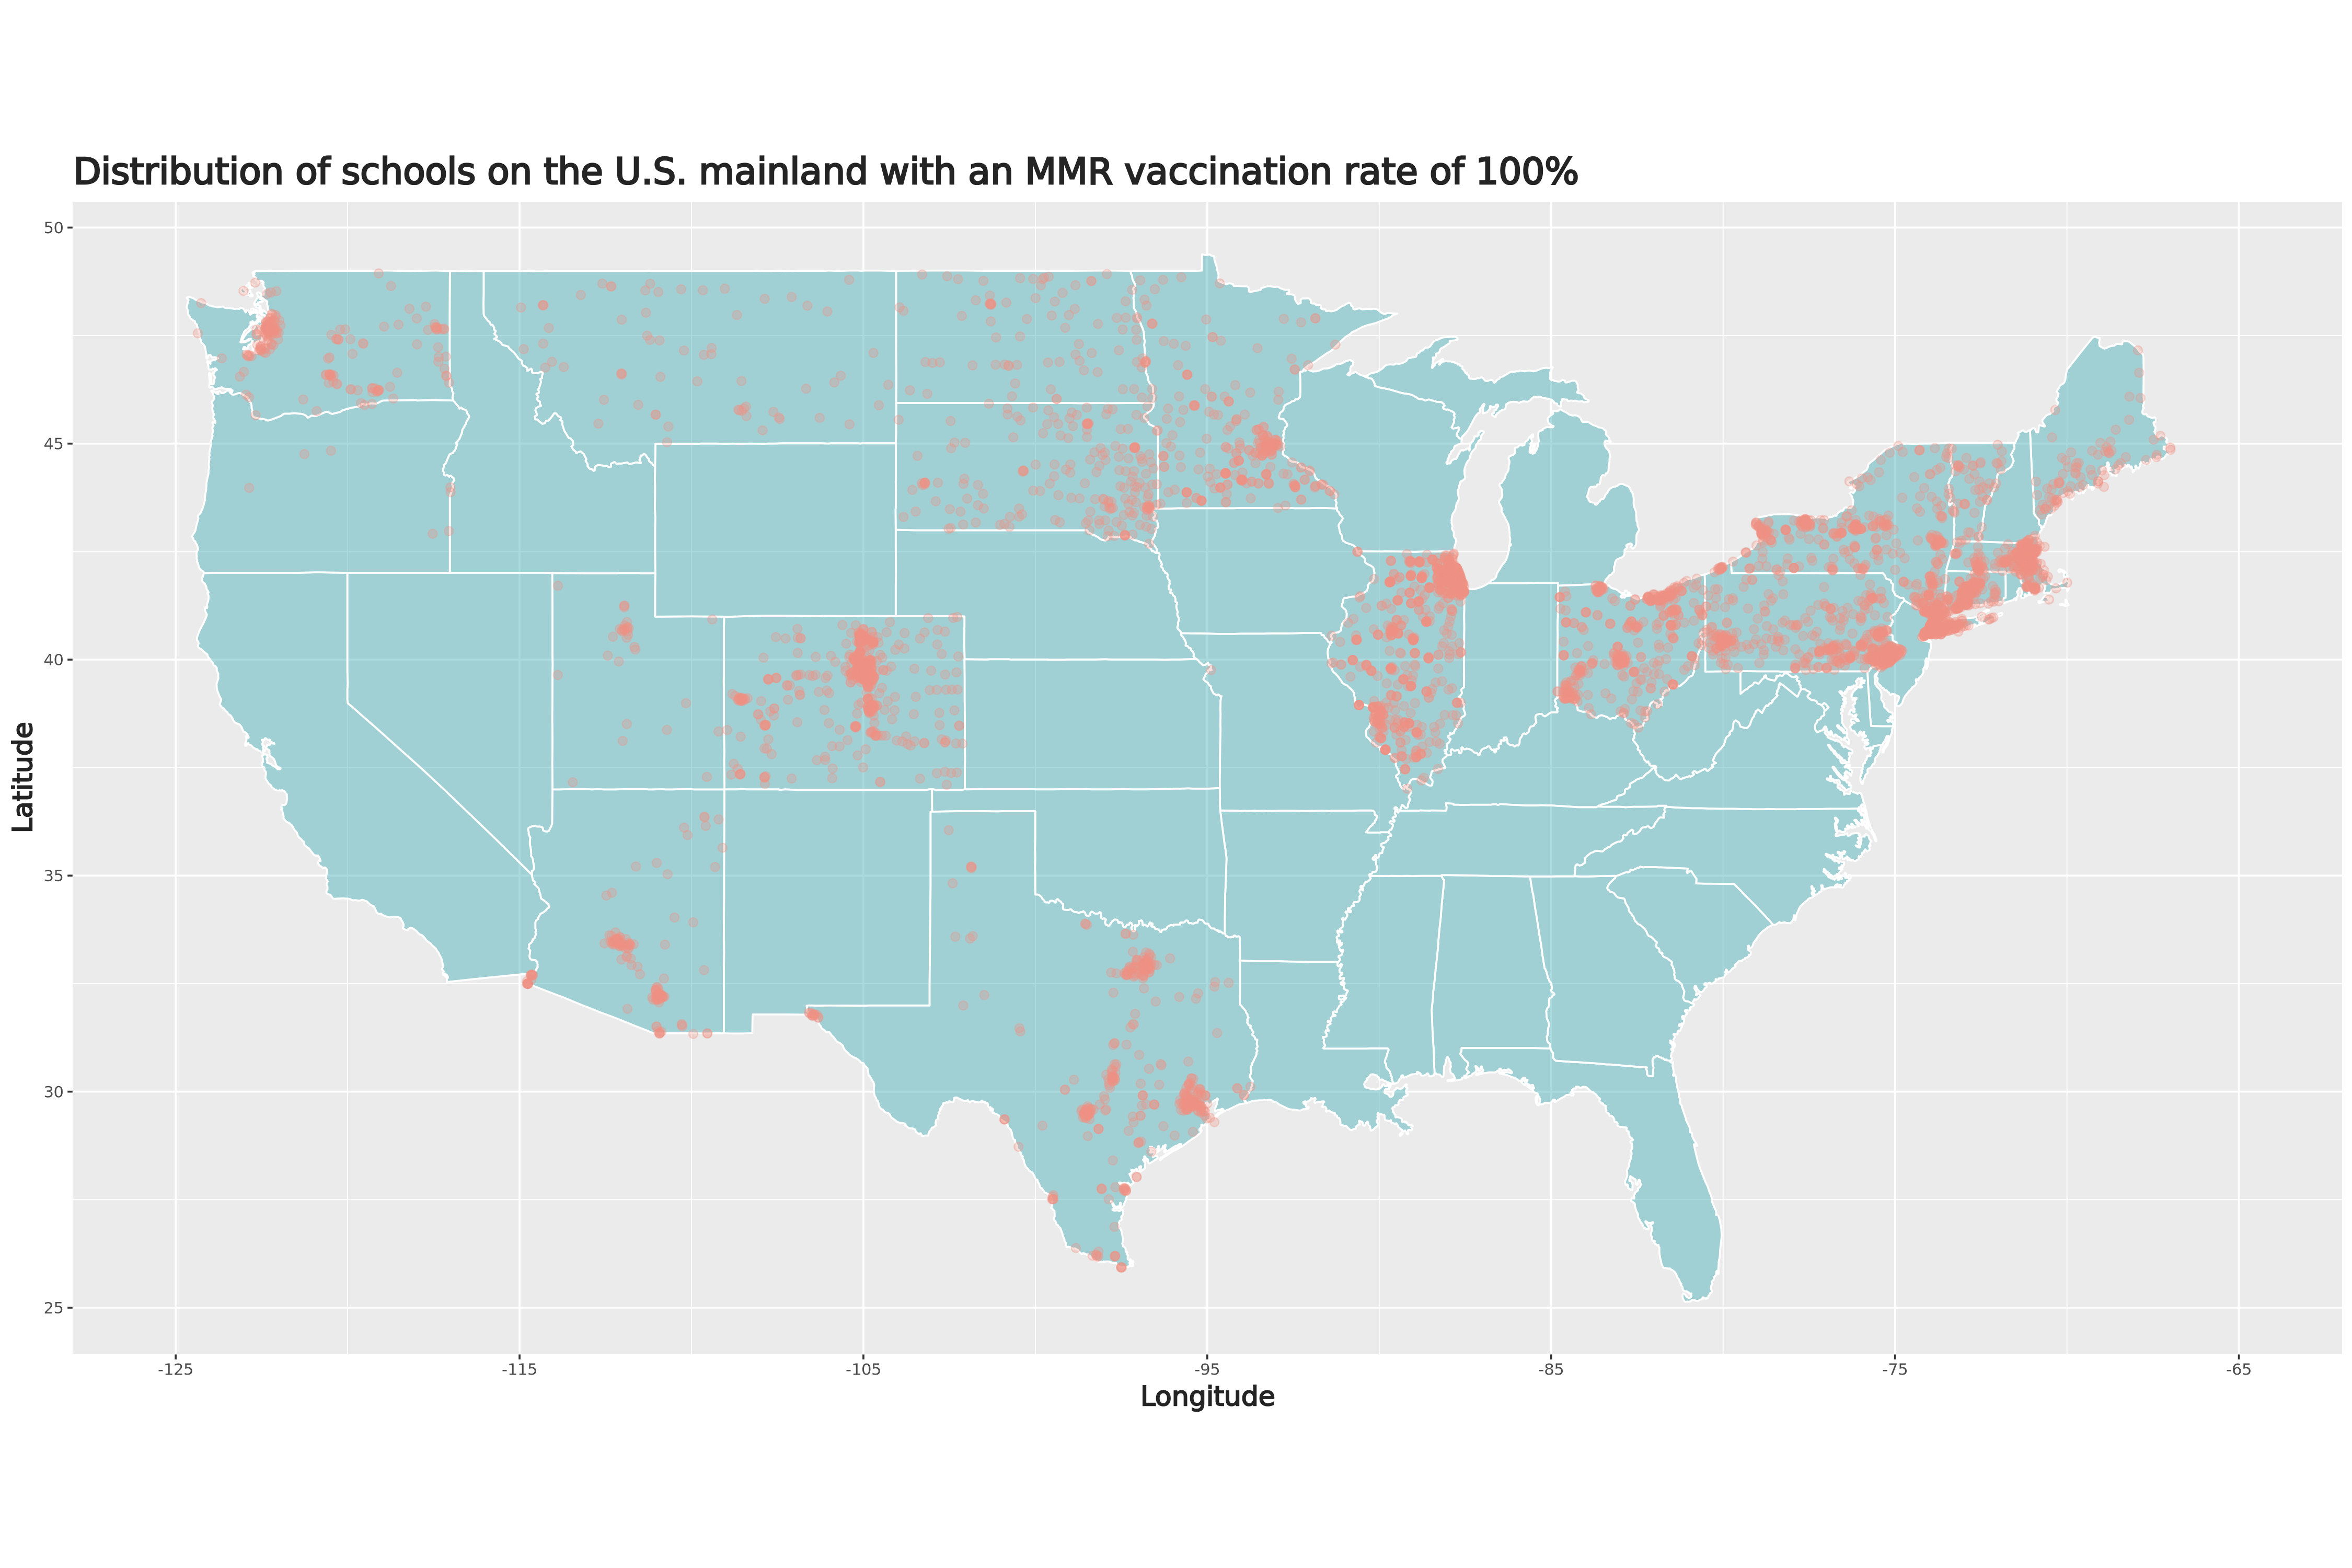

In [5]:
df_map = df |>
    filter (mmr==100, lng<=0)|>
    mutate(lati=lat)

library(mapdata)
US = map_data("state") 

ggplot(US) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = '#56b6be', color = "white", alpha = 0.5) + 
    coord_quickmap()+
    geom_point(color='#ef9285', size= 2, alpha=.3,
                mapping = aes(x=lng, y=lati), 
                data = df_map)+
    labs(title = 'Distribution of schools on the U.S. mainland with an MMR vaccination rate of 100%', x='Longitude', y='Latitude')+
    scale_x_continuous(limits=c(-125, -65), breaks = c(-125, -115, -105, -95, -85, -75, -65))+
    theme(
        plot.title = element_text(color = '#242424', face = 'bold', size = 20), 
        axis.title.y = element_text(color = '#242424', face = 'bold', size = 15), 
        axis.title.x = element_text(color = '#242424', face = 'bold', size = 15)
    )

In case the figure is not rendered by GitHub. It can be reviewed via https://nbsanity.com/static/7d82b750e6e6100cc763a5a94e51bd02/BIOS512_final_project.html (rendered with "nbsanity").